In [2]:
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

%matplotlib inline

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/aczepielik/KRKtram/master/reports/report_07-23.csv')
df1 = pd.read_csv('https://raw.githubusercontent.com/aczepielik/KRKtram/master/reports/report_07-24.csv')
df = pd.concat([df, df1])
df.head()

,index,time_stamp,stop,stopName,number,direction,plannedTime,vehicleId,tripId,status,delay,seq_num
0,1,2018-07-23 06:00:45,378,Os.Piastów,21,Kopiec Wandy,2018-07-23 05:59:00,NaN,6351558574044883205,PLANNED,1,1.0
1,1,2018-07-23 06:00:47,612,Borsucza,22,Walcownia,2018-07-23 06:00:00,6.352185e+18,6351558574044899587,STOPPING,0,7.0
2,1,2018-07-23 06:00:48,572,Smolki,11,Czerwone Maki P+R,2018-07-23 06:00:00,6.352185e+18,6351558574044670211,STOPPING,0,10.0
3,1,2018-07-23 06:00:49,319,Jubilat,1,Wzgórza K.,2018-07-23 05:59:00,NaN,6351558574044363010,PLANNED,1,3.0
4,1,2018-07-23 06:00:49,322,Filharmonia,8,Bronowice Małe,2018-07-23 06:01:00,6.352185e+18,6351558574044592386,STOPPING,0,15.0


In [4]:
df.delay.value_counts(normalize=True)

0     0.414514
1     0.357610
2     0.119549
3     0.056005
4     0.026023
5     0.012583
6     0.005742
7     0.003386
8     0.001479
9     0.001078
10    0.000857
11    0.000408
14    0.000249
12    0.000235
13    0.000166
15    0.000076
16    0.000021
19    0.000014
18    0.000007
Name: delay, dtype: float64

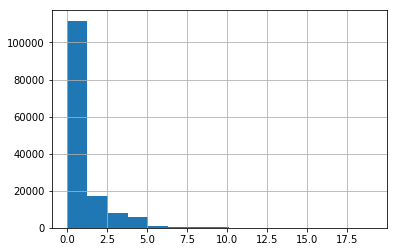

In [5]:
df.delay.hist(bins=15)

In [6]:
df.delay.describe()

count    144719.000000
mean          1.034785
std           1.352726
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max          19.000000
Name: delay, dtype: float64

In [7]:
df.columns

Index(['index', 'time_stamp', 'stop', 'stopName', 'number', 'direction',
       'plannedTime', 'vehicleId', 'tripId', 'status', 'delay', 'seq_num'],
      dtype='object')

In [21]:
df['delay_secs'] = df['delay'].map(lambda x: x*60)
df['direction_cat'] = df['direction'].factorize()[0]
df['vehicleId'].fillna(-1, inplace=True)
df['seq_num'].fillna(-1, inplace=True)

df['number_direct_id'] = df.apply(lambda x: '{} {}'.format(x['number'], x['direction']), axis=1).factorize()[0]
df['stop_direct_id'] = df.apply(lambda x: '{} {}'.format(x['stop'], x['direction']), axis=1).factorize()[0]
feats =[
    'number',
    'stop', 
    'direction_cat', 
    'vehicleId', 
    'seq_num',
    'number_direct_id',
    'stop_direct_id',
]

X = df[ feats ].values 
y = df['delay_secs'].values


model = DecisionTreeRegressor(max_depth=10, random_state=0)
scores = cross_val_score(model, X, y, cv=3, scoring='neg_mean_absolute_error')
np.mean(scores), np.std(scores)
model.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [25]:
my_test = [ [11, 572, 0, 6352185295672180943, 4, 0, 0] ]
model.predict(my_test)

array([42.62626263])

5,2018-07-24 04:33:13,589,"Ruczaj",11,"Mały Płaszów",2018-07-24 04:33:00,"6352185295672180943","6351558574044654082","STOPPING",0,4